In [1]:
#Tarvittavien kirjastojen tuominen.
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
#Aineiston tuominen.
df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)

In [3]:
df.columns = ["Matkustajat"]
df.head()

,Matkustajat
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


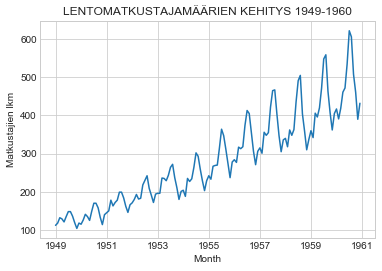

In [18]:
#Matkustajamäärien kehitys vuosina 1949-1960.
plt.ylabel("Matkustajien lkm")
plt.title("LENTOMATKUSTAJAMÄÄRIEN KEHITYS 1949-1960")
df["Matkustajat"].plot()

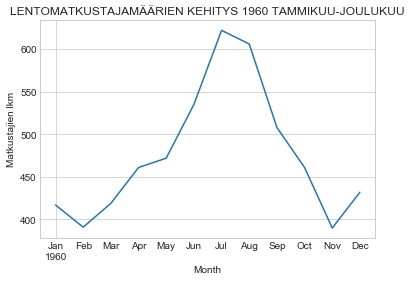

In [20]:
#Kuvaaja matkustajamääristä vuonna 1960 tammikuu - joulukuu.
plt.ylabel("Matkustajien lkm")
plt.title("LENTOMATKUSTAJAMÄÄRIEN KEHITYS 1960 TAMMIKUU-JOULUKUU")
df["Matkustajat"]["1960":].plot()

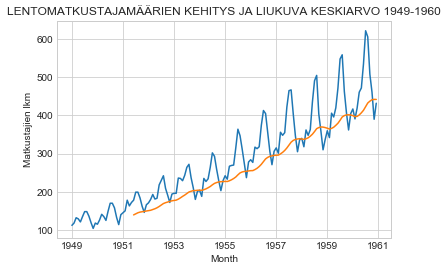

In [24]:
#Liukuvan keskiarvon kuvaaja mukana 30 päivän aikajänteellä laskettuna.
plt.ylabel("Matkustajien lkm")
plt.title("LENTOMATKUSTAJAMÄÄRIEN KEHITYS JA LIUKUVA KESKIARVO 1949-1960")
df["Matkustajat"].plot()
df["Matkustajat"].rolling(30).mean().plot()

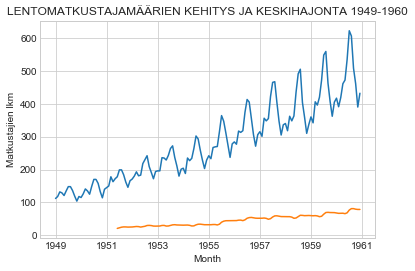

In [25]:
#Keskihajonnan kuvaaja mukana.
plt.ylabel("Matkustajien lkm")
plt.title("LENTOMATKUSTAJAMÄÄRIEN KEHITYS JA KESKIHAJONTA 1949-1960")
df["Matkustajat"].plot()
df["Matkustajat"].rolling(30).std().plot()

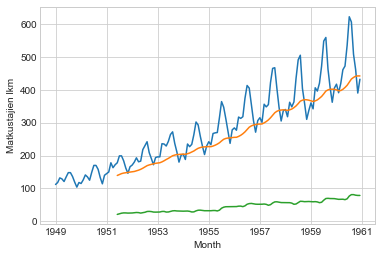

In [26]:
#Matkustajamäärän kehitys sekä liukuva keskiarvo ja keskihajonta.
plt.ylabel("Matkustajien lkm")
df["Matkustajat"].plot()
df["Matkustajat"].rolling(30).mean().plot()
df["Matkustajat"].rolling(30).std().plot()

In [9]:
#Suurimmat matkustajamäärien positiiviset muutosprosentit.
df["Matkustajamäärän muutos"] = df["Matkustajat"].pct_change()
df[["Matkustajamäärän muutos"]].sort_values(by="Matkustajamäärän muutos", ascending=False).head(10).style.format('{:.1%}')

,Matkustajamäärän muutos
Month,
1954-03-01 00:00:00,25.0%
1950-12-01 00:00:00,22.8%
1953-03-01 00:00:00,20.4%
1958-06-01 00:00:00,19.8%
1950-06-01 00:00:00,19.2%
1952-06-01 00:00:00,19.1%
1957-06-01 00:00:00,18.9%
1959-03-01 00:00:00,18.7%
1951-03-01 00:00:00,18.7%


In [10]:
#Suurimmat matkustajamäärien negatiiviset muutosprosentit.
df["Matkustajamäärän muutos"] = df["Matkustajat"].pct_change()
df[["Matkustajamäärän muutos"]].sort_values(by="Matkustajamäärän muutos").head(10).style.format('{:.1%}')

,Matkustajamäärän muutos
Month,
1958-09-01 00:00:00,-20.0%
1959-09-01 00:00:00,-17.2%
1960-09-01 00:00:00,-16.2%
1950-10-01 00:00:00,-15.8%
1960-11-01 00:00:00,-15.4%
1953-11-01 00:00:00,-14.7%
1950-11-01 00:00:00,-14.3%
1957-10-01 00:00:00,-14.1%
1956-10-01 00:00:00,-13.8%


In [11]:
#Päivät, jolloin matkustajamäärän muutosprosentti on ollut yli 20%.
df[(df["Matkustajamäärän muutos"]<-0.20) | (df["Matkustajamäärän muutos"]>0.20)]

,Matkustajat,Matkustajamäärän muutos
Month,,
1950-12-01,140,0.228070
1953-03-01,236,0.204082
1954-03-01,235,0.250000


In [12]:
#Viikonpäivien yhteys matkustajamääriin.
df['Weekday'] = df.index.weekday
df.groupby('Weekday')['Matkustajamäärän muutos'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,19.0,-0.012089,0.115012,-0.200000,-0.095984,-0.025723,0.074116,0.250000
1,23.0,0.003186,0.104993,-0.171735,-0.094113,0.029412,0.094139,0.145923
2,19.0,0.026778,0.098412,-0.142857,-0.024639,0.011905,0.117375,0.166667
3,21.0,0.020586,0.115226,-0.161716,-0.098765,0.011050,0.134615,0.192000
4,21.0,0.046776,0.097205,-0.121037,-0.022727,0.034884,0.100239,0.228070
5,19.0,0.003316,0.109301,-0.136490,-0.095998,0.020073,0.100687,0.188732
6,21.0,0.016149,0.117361,-0.158228,-0.062016,0.000000,0.104278,0.204082


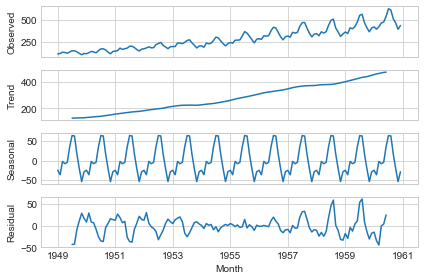

In [13]:
#Trendi- ja kausivaihtelut 1949-1961.
sm.tsa.seasonal_decompose(df["Matkustajat"]).plot()
plt.show()